# Logistic Regression
You should build a machine learning pipeline using a logistic regression model. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Conduct data exploration, data preprocessing, and feature engineering if necessary.
- Train and test a logistic regression model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

**Import Library**

In [2]:
import pandas as pd


Loading the dataset


In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/m-mahdavi/teaching/refs/heads/main/datasets/mnist.csv')
df.head(10)

,id,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,31953,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34452,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60897,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36953,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1981,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,61207,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,33799,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,5414,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,61377,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1875,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Data preprocessing (Text to Data  no yes to 0 1)
#from sklearn.preprocessing import OrdinalEncodern
#new = ['no','yes']
#enc =OrdinalEncoder(categories = [finished_race])
#df['column name with no yes'] = enc.fit_transform(df[['column name with no yes']])


Split the dataset into training and testing set

In [5]:
X = df.drop(['id','class'],axis=1)
Y = df['class']



<Axes: >

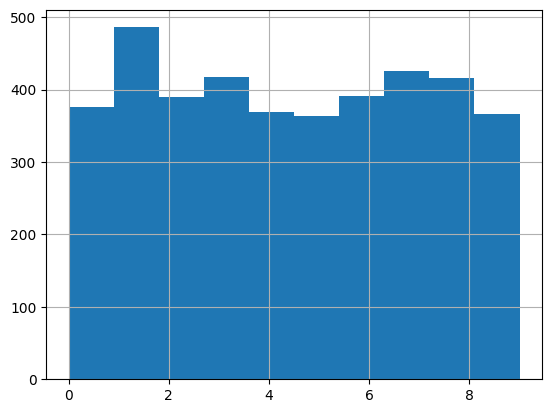

In [6]:
Y.hist()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)



In [8]:
print("X train : ", X_train.shape)
print("X test : ", X_test.shape)
print("Y train : ", Y_train.shape)
print("Y test : ", Y_test.shape)

X train :  (3200, 784)
X test :  (800, 784)
Y train :  (3200,)
Y test :  (800,)


In [9]:
from matplotlib import pyplot as plt


In [10]:
#plt.(X_train,Y_train )

In [11]:
#Data Scaling to bring all features to range [0-1]

X_train = X_train/255
X_test = X_test/255

In [12]:
#Data Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from sklearn.linear_model import LogisticRegression


In [14]:
  model = LogisticRegression()
  model.fit(X_train,Y_train)

LogisticRegression()

In [15]:
model.score(X_test,Y_test)
#0.89875 without scaling
#0.88 with scaling

0.8875

[[69  0  0  0  0  1  0  0  0  0]
 [ 0 96  0  1  0  0  1  0  2  0]
 [ 0  2 59  3  2  0  4  1  2  0]
 [ 0  1  4 72  1  6  0  0  2  0]
 [ 0  0  0  0 78  0  1  0  1  0]
 [ 0  1  1  1  1 56  0  0  4  0]
 [ 0  1  7  0  0  2 79  1  0  0]
 [ 0  0  0  0  1  0  0 64  0  2]
 [ 1  3  5  2  0  6  1  0 72  4]
 [ 0  0  0  1  6  0  0  3  1 65]]


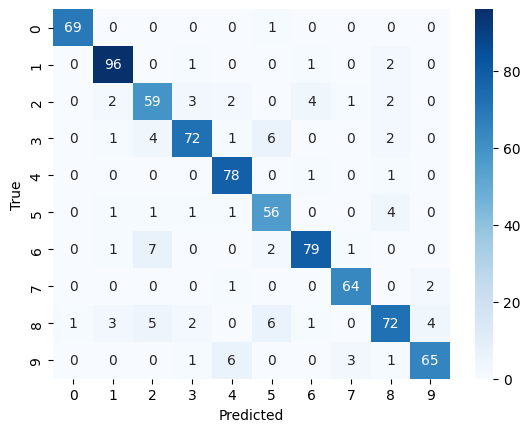

In [16]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
print (cm)

import seaborn as sns
sns.heatmap(cm,annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()




In [17]:
from sklearn.metrics import classification_report, accuracy_score
print(accuracy_score(Y_test,y_pred))
print(classification_report(Y_test,y_pred))


0.8875
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        70
           1       0.92      0.96      0.94       100
           2       0.78      0.81      0.79        73
           3       0.90      0.84      0.87        86
           4       0.88      0.97      0.92        80
           5       0.79      0.88      0.83        64
           6       0.92      0.88      0.90        90
           7       0.93      0.96      0.94        67
           8       0.86      0.77      0.81        94
           9       0.92      0.86      0.88        76

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800

